# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 2 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.2 Network sampling

#### Exercise 2.7: Random walk on the Facebook network

In [1]:
import requests
import random
import numpy as np
import matplotlib.pyplot as plt

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
# Base url of the API
URL_TEMPLATE = 'http://iccluster051.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'
# Target user id
user_id = 'f30ff3966f16ed62f5165a229a19b319'
# The actual url to call 
url = URL_TEMPLATE.format(user_id=user_id)
# Execute the HTTP Get request
response = requests.get(url)
# Format the json response as a Python dict
data = response.json()
print(data['age'])

19


In [3]:
def get_node(user_id):
    # Base url of the API
    URL_TEMPLATE = 'http://iccluster051.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'
    # The actual url to call 
    url = URL_TEMPLATE.format(user_id=user_id)
    # Execute the HTTP Get request
    response = requests.get(url)
    # Format the json response as a Python dict
    data = response.json()
    return data

In [40]:
#random walker 
def random_walker(source_node_id, N, print_visited=False):
    temp_node=get_node(source_node_id)
    temp_node_id=source_node_id
    i=0
    age=0
    visited=dict()
    while i<N:
        
        if print_visited:
            visited[temp_node_id] = visited.get(temp_node_id, 0) + 1
        
        age=age+temp_node['age']
        #select next node randomly from freinds/neighbours
        friends=temp_node['friends']
        temp_node_id=random.choice(friends)
        temp_node=get_node(temp_node_id)
        i=i+1
        
    
    #do not allow division by 0 
    if N==0:
        print ("No nodes visited, N=0")
    else :
        av_age=age/N
        print ("average age: ",av_age)
        print ("nodes visited: ", N)
        
        if print_visited:
            width = 0.5     # gives histogram aspect to the bar diagram
            #hide x axis(node_id too long)
            ax = plt.axes()
            ax.set_xticks([])
            
            #list() for python 3
            plt.bar(range(len(list(visited.values()))),list(visited.values()),width=width,color="b")
            plt.show()

In [19]:
i = 500
while i < 7001:
    random_walker(user_id,i)
    i=i+500

average age:  31.398
nodes visited:  500
average age:  23.854
nodes visited:  1000
average age:  22.932
nodes visited:  1500
average age:  23.1305
nodes visited:  2000
average age:  23.0336
nodes visited:  2500
average age:  22.822333333333333
nodes visited:  3000
average age:  22.78514285714286
nodes visited:  3500
average age:  22.26625
nodes visited:  4000
average age:  23.034222222222223
nodes visited:  4500
average age:  23.1962
nodes visited:  5000
average age:  23.559454545454546
nodes visited:  5500
average age:  22.675166666666666
nodes visited:  6000
average age:  23.487384615384617
nodes visited:  6500
average age:  22.629
nodes visited:  7000


the average age seems to converge somewhere around 23 years 

How many nodes do we need to get a precise estimate? --> check slides?

#### Exercise 2.8

average age:  21.724
nodes visited:  500


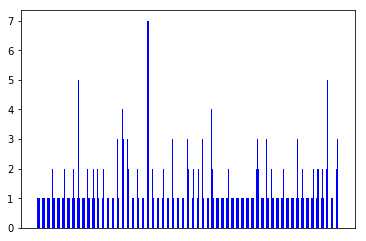

In [42]:
random_walker(user_id,500,print_visited=True)

We can clearely see that some nodes are visited more than once. So the random walker is often returning to already visited nodes. Those nodes are probably better connected than other and thus more probable to being visited. Of course this destroys the average because well connected nodes weight more than not so well connected ones. Thus we could try to only visit nodes that were not visited before.

In [43]:
#random walker 
def random_walker2(source_node_id, N, print_visited=False):
    temp_node=get_node(source_node_id)
    temp_node_id=source_node_id
    i=0
    age=0
    visited=dict()
    age_history=[]
    while i<N:
        
        # only add age if not visited before, and only increment i in that case
        was_visited=False
        if temp_node_id in visited:
            was_visited=True
        
        #TODO: random jump?, randomly go backwards or randomly to next node or randomly to visited?, do bigger steps?
        
        #TODO: degree bias, mixing time
        
        #TODO: add stopping criteria?
        
        
            
        if not was_visited:
            age=age+temp_node['age']
            #add to visited dictionary
            visited[temp_node_id] = visited.get(temp_node_id, 0) + 1
            
        #select next node randomly from freinds/neighbours
        friends=temp_node['friends']
        temp_node_id=random.choice(friends)
        
        tries=0
        threshold=len(friends)*500
        while temp_node_id in visited and threshold>tries:
            temp_node_id=random.choice(friends)
            tries=tries+1 
            #if tries==threshold:
                #print("visited again")
        #print ("found one, tries: ", tries)
        
        temp_node=get_node(temp_node_id)
        
        if not was_visited:
            i=i+1
            
        if i%100==0:
            if len(age_history)== (i/100)-1:
                age_history.append(age/i)
            print ("step: ",i)
            print ("average age: ", age/i)
            
        #make it stop automatically if change in last x nodes was not too big?
        
    
    #do not allow division by 0 
    if N==0:
        print ("No nodes visited, N=0")
    else :
        av_age=age/N
        print ("average age: ",av_age)
        print ("nodes visited: ", N)
        
        if print_visited:
            width = 0.5     # gives histogram aspect to the bar diagram
            #hide x axis(node_id too long)
            ax = plt.axes()
            ax.set_xticks([])
            
            plt.bar(range(len(list(visited.values()))),list(visited.values()),width=width,color="b")
            plt.show()
            plt.plot(age_history)
            plt.show()

In [47]:
random_walker2(user_id,500000, print_visited=True)

step:  100
average age:  22.62
step:  200
average age:  23.055
step:  200
average age:  23.055
step:  300
average age:  23.5
step:  400
average age:  22.1525
step:  500
average age:  21.536
step:  600
average age:  21.821666666666665
step:  700
average age:  21.752857142857142
step:  800
average age:  22.44125
step:  900
average age:  22.281111111111112
step:  1000
average age:  22.545
step:  1100
average age:  22.425454545454546
step:  1200
average age:  22.46
step:  1300
average age:  22.647692307692306
step:  1400
average age:  22.435714285714287
step:  1500
average age:  22.506666666666668
step:  1600
average age:  22.445
step:  1700
average age:  22.355882352941176
step:  1800
average age:  22.575555555555557
step:  1900
average age:  22.71421052631579
step:  2000
average age:  23.028
step:  2000
average age:  23.028
step:  2100
average age:  23.03
step:  2200
average age:  22.980454545454545
step:  2300
average age:  23.01
step:  2400
average age:  23.005
step:  2500
average age:

step:  13900
average age:  24.303309352517985
step:  14000
average age:  24.313357142857143
step:  14100
average age:  24.362765957446808
step:  14200
average age:  24.35711267605634
step:  14300
average age:  24.375804195804196
step:  14400
average age:  24.4425
step:  14500
average age:  24.454
step:  14600
average age:  24.48164383561644
step:  14700
average age:  24.47394557823129
step:  14700
average age:  24.47394557823129
step:  14700
average age:  24.47394557823129
step:  14800
average age:  24.48
step:  14900
average age:  24.528993288590605
step:  14900
average age:  24.528993288590605
step:  15000
average age:  24.547266666666665
step:  15100
average age:  24.583576158940396
step:  15200
average age:  24.601973684210527
step:  15300
average age:  24.600849673202614
step:  15400
average age:  24.6112987012987
step:  15500
average age:  24.647354838709678
step:  15600
average age:  24.657179487179487
step:  15700
average age:  24.654649681528664
step:  15800
average age:  24.6

step:  22200
average age:  25.70463963963964
step:  22300
average age:  25.712286995515694
step:  22400
average age:  25.71919642857143
step:  22500
average age:  25.7432
step:  22600
average age:  25.756946902654867
step:  22700
average age:  25.756343612334803
step:  22800
average age:  25.767850877192984
step:  22900
average age:  25.77593886462882
step:  23000
average age:  25.796565217391304
step:  23100
average age:  25.819523809523808
step:  23200
average age:  25.837629310344827
step:  23300
average age:  25.838884120171674
step:  23400
average age:  25.851196581196582
step:  23500
average age:  25.845276595744682
step:  23600
average age:  25.864406779661017
step:  23700
average age:  25.866877637130802
step:  23800
average age:  25.887563025210085
step:  23900
average age:  25.889539748953975
step:  23900
average age:  25.889539748953975
step:  24000
average age:  25.908666666666665
step:  24100
average age:  25.92381742738589
step:  24100
average age:  25.92381742738589
step

step:  35000
average age:  27.079942857142857
step:  35100
average age:  27.08780626780627
step:  35100
average age:  27.08780626780627
step:  35200
average age:  27.09724431818182
step:  35200
average age:  27.09724431818182
step:  35300
average age:  27.105949008498584
step:  35400
average age:  27.102175141242938
step:  35400
average age:  27.102175141242938
step:  35500
average age:  27.111971830985915
step:  35600
average age:  27.122893258426966
step:  35600
average age:  27.122893258426966
step:  35700
average age:  27.124145658263306
step:  35800
average age:  27.138491620111733
step:  35900
average age:  27.149637883008356
step:  36000
average age:  27.163
step:  36100
average age:  27.187091412742383
step:  36100
average age:  27.187091412742383
step:  36100
average age:  27.187091412742383
step:  36100
average age:  27.187091412742383
step:  36100
average age:  27.187091412742383
step:  36100
average age:  27.187091412742383
step:  36100
average age:  27.187091412742383
step

step:  43100
average age:  28.053016241299304
step:  43100
average age:  28.053016241299304
step:  43100
average age:  28.053016241299304
step:  43100
average age:  28.053016241299304
step:  43100
average age:  28.053016241299304
step:  43100
average age:  28.053016241299304
step:  43100
average age:  28.053016241299304
step:  43100
average age:  28.053016241299304
step:  43100
average age:  28.053016241299304
step:  43100
average age:  28.053016241299304
step:  43100
average age:  28.053016241299304
step:  43100
average age:  28.053016241299304
step:  43100
average age:  28.053016241299304
step:  43200
average age:  28.063425925925927
step:  43300
average age:  28.07875288683603
step:  43400
average age:  28.08942396313364
step:  43500
average age:  28.10919540229885
step:  43600
average age:  28.118211009174313
step:  43700
average age:  28.125148741418766
step:  43700
average age:  28.125148741418766
step:  43800
average age:  28.127534246575344
step:  43900
average age:  28.1409111

step:  51400
average age:  29.019630350194554
step:  51400
average age:  29.019630350194554
step:  51500
average age:  29.0346213592233
step:  51600
average age:  29.046531007751938
step:  51700
average age:  29.04199226305609
step:  51800
average age:  29.054266409266408
step:  51800
average age:  29.054266409266408
step:  51800
average age:  29.054266409266408
step:  51800
average age:  29.054266409266408
step:  51800
average age:  29.054266409266408
step:  51900
average age:  29.068420038535645
step:  51900
average age:  29.068420038535645
step:  51900
average age:  29.068420038535645
step:  51900
average age:  29.068420038535645
step:  51900
average age:  29.068420038535645
step:  51900
average age:  29.068420038535645
step:  51900
average age:  29.068420038535645
step:  52000
average age:  29.074653846153847
step:  52100
average age:  29.08978886756238
step:  52100
average age:  29.08978886756238
step:  52100
average age:  29.08978886756238
step:  52200
average age:  29.1123946360

step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58400
average age:  29.780393835616437
step:  58500
average age:  29.788376068376067
step:  58500
average age:  29.788376068376067
step:  58500
average age:  29.7883

step:  66600
average age:  30.69475975975976
step:  66700
average age:  30.709310344827585
step:  66800
average age:  30.719580838323353
step:  66900
average age:  30.734618834080717
step:  67000
average age:  30.747149253731344
step:  67000
average age:  30.747149253731344
step:  67000
average age:  30.747149253731344
step:  67000
average age:  30.747149253731344
step:  67000
average age:  30.747149253731344
step:  67000
average age:  30.747149253731344
step:  67000
average age:  30.747149253731344
step:  67000
average age:  30.747149253731344
step:  67000
average age:  30.747149253731344
step:  67000
average age:  30.747149253731344
step:  67000
average age:  30.747149253731344
step:  67100
average age:  30.765022354694487
step:  67200
average age:  30.771443452380954
step:  67300
average age:  30.78178306092125
step:  67400
average age:  30.785964391691394
step:  67500
average age:  30.792088888888888
step:  67500
average age:  30.792088888888888
step:  67600
average age:  30.802278

step:  73400
average age:  31.43217983651226
step:  73500
average age:  31.44412244897959
step:  73500
average age:  31.44412244897959
step:  73500
average age:  31.44412244897959
step:  73500
average age:  31.44412244897959
step:  73500
average age:  31.44412244897959
step:  73500
average age:  31.44412244897959
step:  73500
average age:  31.44412244897959
step:  73600
average age:  31.45766304347826
step:  73600
average age:  31.45766304347826
step:  73600
average age:  31.45766304347826
step:  73700
average age:  31.46597014925373
step:  73800
average age:  31.473563685636858
step:  73900
average age:  31.48255751014885
step:  74000
average age:  31.495554054054054
step:  74100
average age:  31.50697705802969
step:  74200
average age:  31.520390835579516
step:  74300
average age:  31.53263795423957
step:  74400
average age:  31.544623655913977
step:  74500
average age:  31.553073825503354
step:  74600
average age:  31.573351206434317
step:  74600
average age:  31.573351206434317
ste

step:  80700
average age:  32.2127385377943
step:  80800
average age:  32.2284900990099
step:  80900
average age:  32.23831891223733
step:  81000
average age:  32.24946913580247
step:  81100
average age:  32.25945745992602
step:  81200
average age:  32.26793103448276
step:  81300
average age:  32.27806888068881
step:  81400
average age:  32.29362407862408
step:  81500
average age:  32.30644171779141
step:  81600
average age:  32.315098039215684
step:  81600
average age:  32.315098039215684
step:  81700
average age:  32.328066095471236
step:  81700
average age:  32.328066095471236
step:  81700
average age:  32.328066095471236
step:  81700
average age:  32.328066095471236
step:  81700
average age:  32.328066095471236
step:  81800
average age:  32.33363080684597
step:  81800
average age:  32.33363080684597
step:  81800
average age:  32.33363080684597
step:  81900
average age:  32.34159951159951
step:  82000
average age:  32.356
step:  82100
average age:  32.36627283800244
step:  82200
ave

step:  87200
average age:  32.901272935779815
step:  87200
average age:  32.901272935779815
step:  87200
average age:  32.901272935779815
step:  87200
average age:  32.901272935779815
step:  87200
average age:  32.901272935779815
step:  87200
average age:  32.901272935779815
step:  87200
average age:  32.901272935779815
step:  87300
average age:  32.909541809851085
step:  87300
average age:  32.909541809851085
step:  87400
average age:  32.92052631578947
step:  87400
average age:  32.92052631578947
step:  87500
average age:  32.93369142857143
step:  87500
average age:  32.93369142857143
step:  87500
average age:  32.93369142857143
step:  87500
average age:  32.93369142857143
step:  87500
average age:  32.93369142857143
step:  87500
average age:  32.93369142857143
step:  87500
average age:  32.93369142857143
step:  87600
average age:  32.94606164383562
step:  87700
average age:  32.954960091220066
step:  87800
average age:  32.96376993166287
step:  87900
average age:  32.97353811149033


step:  93000
average age:  33.490204301075266
step:  93000
average age:  33.490204301075266
step:  93000
average age:  33.490204301075266
step:  93000
average age:  33.490204301075266
step:  93000
average age:  33.490204301075266
step:  93100
average age:  33.49843179377014
step:  93100
average age:  33.49843179377014
step:  93200
average age:  33.50829399141631
step:  93300
average age:  33.516763129689174
step:  93400
average age:  33.52656316916488
step:  93400
average age:  33.52656316916488
step:  93500
average age:  33.534930481283425
step:  93600
average age:  33.54831196581197
step:  93600
average age:  33.54831196581197
step:  93700
average age:  33.55958377801494
step:  93700
average age:  33.55958377801494
step:  93800
average age:  33.56910447761194
step:  93900
average age:  33.57172523961661
step:  93900
average age:  33.57172523961661
step:  94000
average age:  33.580553191489365
step:  94000
average age:  33.580553191489365
step:  94100
average age:  33.593007438894794


step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  99400
average age:  34.12529175050302
step:  994

step:  104500
average age:  34.620344497607654
step:  104600
average age:  34.62904397705545
step:  104700
average age:  34.63758357211079
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
average age:  34.647395038167936
step:  104800
a

ConnectionError: HTTPConnectionPool(host='iccluster051.iccluster.epfl.ch', port=5050): Max retries exceeded with url: /v1.0/facebook?user=640daa9b17502e71cd73b79616726c4b (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x110c18d68>: Failed to establish a new connection: [Errno 51] Network is unreachable',))